In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import joblib

In [3]:
#Import Data
pd.set_option('display.max_columns', None)
df = pd.read_csv("DATA/nba_data_with_salaries.csv")
df.head()

,PLAYER_ID,PLAYER_NAME,NICKNAME_base,TEAM_ID_base,TEAM_ABBREVIATION_base,AGE_base,GP_base,W_base,L_base,W_PCT_base,MIN_base,FGM_base,FGA_base,FG_PCT_base,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,WNBA_FANTASY_PTS,GP_RANK_base,W_RANK_base,L_RANK_base,W_PCT_RANK_base,MIN_RANK_base,FGM_RANK_base,FGA_RANK_base,FG_PCT_RANK_base,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,TEAM_COUNT_base,NICKNAME_adv,TEAM_ID_adv,TEAM_ABBREVIATION_adv,AGE_adv,GP_adv,W_adv,L_adv,W_PCT_adv,MIN_adv,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM_adv,FGA_adv,FGM_PG,FGA_PG,FG_PCT_adv,GP_RANK_adv,W_RANK_adv,L_RANK_adv,W_PCT_RANK_adv,MIN_RANK_adv,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK_adv,FGA_RANK_adv,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK_adv,TEAM_COUNT_adv,SALARY
0,203932.0,Aaron Gordon,Aaron,1.610613e+09,DEN,29.0,51.0,33.0,18.0,0.647,28.4,5.2,9.7,0.531,1.5,3.4,0.436,2.8,3.5,0.810,1.6,3.3,4.8,3.2,1.4,0.5,0.3,0.7,1.6,2.7,14.7,5.9,26.0,3.0,0.0,25.6,275.0,166.0,345.0,101.0,120.0,113.0,139.0,79.0,171.0,219.0,24.0,73.0,76.0,196.0,91.0,163.0,136.0,118.0,147.0,382.0,290.0,84.0,277.0,89.0,98.0,26.0,127.0,134.0,44.0,124.0,1.0,Aaron,1.610613e+09,DEN,29.0,51.0,33.0,18.0,0.647,28.4,121.3,122.5,122.5,112.8,113.0,113.0,8.5,9.5,9.5,0.143,2.25,20.1,0.060,0.109,0.086,9.0,9.0,0.607,0.650,0.186,0.189,102.24,101.64,84.70,101.64,0.104,3068.0,264.0,497.0,5.2,9.7,0.531,275.0,166.0,211.0,101.0,120.0,16.0,10.0,10.0,362.0,344.0,344.0,66.0,55.0,55.0,235.0,144.0,193.0,158.0,340.0,248.0,222.0,224.0,69.0,37.0,218.0,230.0,206.0,240.0,240.0,176.0,150.0,182.0,113.0,139.0,79.0,1.0,22841455
1,1628988.0,Aaron Holiday,Aaron,1.610613e+09,HOU,28.0,62.0,39.0,23.0,0.629,12.8,1.9,4.3,0.437,1.2,2.9,0.398,0.5,0.7,0.829,0.2,1.0,1.3,1.3,0.6,0.3,0.2,0.2,1.0,0.8,5.5,1.4,9.9,0.0,0.0,10.2,192.0,100.0,280.0,124.0,403.0,381.0,374.0,325.0,220.0,258.0,91.0,392.0,412.0,142.0,510.0,456.0,485.0,320.0,382.0,453.0,385.0,415.0,413.0,350.0,363.0,142.0,422.0,281.0,44.0,403.0,1.0,Aaron,1.610613e+09,HOU,28.0,62.0,39.0,23.0,0.629,12.8,109.6,110.3,110.3,105.0,103.6,103.6,4.6,6.7,6.7,0.142,2.24,20.5,0.015,0.073,0.044,9.1,9.1,0.571,0.594,0.162,0.168,102.69,103.09,85.91,103.09,0.082,1689.0,117.0,268.0,1.9,4.3,0.437,192.0,100.0,283.0,124.0,403.0,300.0,279.0,279.0,62.0,58.0,58.0,135.0,87.0,87.0,240.0,145.0,189.0,504.0,513.0,532.0,236.0,236.0,154.0,164.0,323.0,319.0,163.0,146.0,146.0,333.0,304.0,297.0,381.0,374.0,325.0,1.0,4668000
2,1630174.0,Aaron Nesmith,Aaron,1.610613e+09,IND,25.0,45.0,29.0,16.0,0.644,24.9,4.3,8.4,0.507,1.9,4.3,0.431,1.6,1.8,0.913,0.8,3.1,4.0,1.2,0.8,0.8,0.4,0.5,2.5,1.7,12.0,4.4,21.2,0.0,0.0,21.4,318.0,212.0,369.0,102.0,182.0,153.0,173.0,116.0,104.0,151.0,34.0,151.0,194.0,33.0,256.0,179.0,195.0,342.0,306.0,210.0,231.0,182.0,52.0,169.0,147.0,53.0,193.0,281.0,44.0,180.0,1.0,Aaron,1.610613e+09,IND,25.0,45.0,29.0,16.0,0.644,24.9,120.7,120.1,120.1,109.8,111.5,111.5,10.9,8.5,8.5,0.063,1.46,10.8,0.034,0.118,0.078,7.4,7.3,0.617,0.653,0.171,0.176,102.15,101.64,84.70,101.64,0.087,2373.0,192.0,379.0,4.3,8.4,0.507,318.0,212.0,189.0,102.0,182.0,21.0,29.0,29.0,224.0,295.0,295.0,39.0,68.0,68.0,507.0,371.0,486.0,326.0,286.0,297.0,109.0,106.0,58.0,36.0,276.0,280.0,212.0,241.0,241.

In [4]:
#Preparing the data
def prep_data(path="DATA/nba_data_with_salaries.csv"):
    df = pd.read_csv(path)
    df = df[df["MIN_base"] > 0].copy()

    #Convert to minutes per game to normalize playing time
    #Industry standard is 36 minutes per game in order to normalize
    #We do this so that the data doesnt skew towards players who play more minuters or less
    per36 = 36.0 / df["MIN_base"]
    df["PTS_per36"] = df["PTS"] * per36
    df["AST_per36"] = df["AST"] * per36
    df["REB_per36"] = df["REB"] * per36
    df["STL_per36"] = df["STL"] * per36
    df["BLK_per36"] = df["BLK"] * per36

    #Direct Impact Score
    df["impact_r"] = (
        0.5 * df["PTS_per36"] 
        + (0.7 * df["AST_per36"]) 
        + (0.7 * df["REB_per36"]) 
        + (1.0 * df["STL_per36"]) 
        + (1.0 * df["BLK_per36"]) 
        + (5.0 * df["TS_PCT"]) 
        - df["TS_PCT"].mean()
    )

    impact_mean = df["impact_r"].mean()
    impact_std = df["impact_r"].std()
    df["impact_z"] = (df["impact_r"] - impact_mean) / impact_std

    #Salary Score
    df["salary_m"] = df["SALARY"] / 1000000
    base_salary = df["salary_m"].median()
    impact_clip = df["impact_z"].clip(-2, 3)
    df["fair_salary_m"] = base_salary + 5 * (impact_clip + 2)
    df["salary_surplus_m"] = df["fair_salary_m"] - df["salary_m"]
    df["salary_surplus_norm"] = df["salary_surplus_m"] / 5

    #Age Score
    def age_score(age):
        if age <= 24:
            return 1
        elif age < 32:
            return 1 - 0.5 * (age - 24) / 8
        return max(0.0, 0.5 - 0.05 * (age - 32))
    
    df["age_score"] = df["AGE_base"].apply(age_score)

    #Frequency Score
    df["freq_score"] = np.minimum(1.0, df["GP_base"] / 75.0)

    #Final Score
    df["final"] = (
        1.3 * df["impact_z"] 
        + 1.0 * df["salary_surplus_norm"]
        + 0.5 * df["age_score"]
        + 0.3 * df["freq_score"]
    )

    final_mean = df["final"].mean()
    final_std = df["final"].std()
    df["final_score"] = (df["final"] - final_mean) / final_std

    return df
    

In [5]:
def train_model_mlp(df):
    #Features that we want apart of our model
    features = [
        "AGE_base", "GP_base", "salary_m", 
        "PTS_per36", "AST_per36", "REB_per36", 
        "STL_per36", "BLK_per36", "TS_PCT", 
        "FG_PCT_base", "FG3_PCT"]
    
    #Create X and y
    X = df[features].values
    y = df["final_score"].values

    #Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)
    
    #Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    #Create model
    mlp = MLPRegressor(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        max_iter=500,
        random_state=42
    )

    mlp.fit(X_train_scaled, y_train)
    df["final_score_pred"] = mlp.predict(scaler.transform(X))

    return mlp, scaler, df

In [6]:
df_test = prep_data("DATA/nba_data_with_salaries.csv")
df_test.head()

,PLAYER_ID,PLAYER_NAME,NICKNAME_base,TEAM_ID_base,TEAM_ABBREVIATION_base,AGE_base,GP_base,W_base,L_base,W_PCT_base,MIN_base,FGM_base,FGA_base,FG_PCT_base,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,WNBA_FANTASY_PTS,GP_RANK_base,W_RANK_base,L_RANK_base,W_PCT_RANK_base,MIN_RANK_base,FGM_RANK_base,FGA_RANK_base,FG_PCT_RANK_base,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,TEAM_COUNT_base,NICKNAME_adv,TEAM_ID_adv,TEAM_ABBREVIATION_adv,AGE_adv,GP_adv,W_adv,L_adv,W_PCT_adv,MIN_adv,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,E_DEF_RATING,DEF_RATING,sp_work_DEF_RATING,E_NET_RATING,NET_RATING,sp_work_NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM_adv,FGA_adv,FGM_PG,FGA_PG,FG_PCT_adv,GP_RANK_adv,W_RANK_adv,L_RANK_adv,W_PCT_RANK_adv,MIN_RANK_adv,E_OFF_RATING_RANK,OFF_RATING_RANK,sp_work_OFF_RATING_RANK,E_DEF_RATING_RANK,DEF_RATING_RANK,sp_work_DEF_RATING_RANK,E_NET_RATING_RANK,NET_RATING_RANK,sp_work_NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,E_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK_adv,FGA_RANK_adv,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK_adv,TEAM_COUNT_adv,SALARY,PTS_per36,AST_per36,REB_per36,STL_per36,BLK_per36,impact_r,impact_z,salary_m,fair_salary_m,salary_surplus_m,salary_surplus_norm,age_score,freq_score,final,final_score
0,203932.0,Aaron Gordon,Aaron,1.610613e+09,DEN,29.0,51.0,33.0,18.0,0.647,28.4,5.2,9.7,0.531,1.5,3.4,0.436,2.8,3.5,0.810,1.6,3.3,4.8,3.2,1.4,0.5,0.3,0.7,1.6,2.7,14.7,5.9,26.0,3.0,0.0,25.6,275.0,166.0,345.0,101.0,120.0,113.0,139.0,79.0,171.0,219.0,24.0,73.0,76.0,196.0,91.0,163.0,136.0,118.0,147.0,382.0,290.0,84.0,277.0,89.0,98.0,26.0,127.0,134.0,44.0,124.0,1.0,Aaron,1.610613e+09,DEN,29.0,51.0,33.0,18.0,0.647,28.4,121.3,122.5,122.5,112.8,113.0,113.0,8.5,9.5,9.5,0.143,2.25,20.1,0.060,0.109,0.086,9.0,9.0,0.607,0.650,0.186,0.189,102.24,101.64,84.70,101.64,0.104,3068.0,264.0,497.0,5.2,9.7,0.531,275.0,166.0,211.0,101.0,120.0,16.0,10.0,10.0,362.0,344.0,344.0,66.0,55.0,55.0,235.0,144.0,193.0,158.0,340.0,248.0,222.0,224.0,69.0,37.0,218.0,230.0,206.0,240.0,240.0,176.0,150.0,182.0,113.0,139.0,79.0,1.0,22841455,18.633803,4.056338,6.084507,0.633803,0.380282,20.114317,0.150976,22.841455,15.952640,-6.888815,-1.377763,0.6875,0.680000,-0.633744,-0.872112
1,1628988.0,Aaron Holiday,Aaron,1.610613e+09,HOU,28.0,62.0,39.0,23.0,0.629,12.8,1.9,4.3,0.437,1.2,2.9,0.398,0.5,0.7,0.829,0.2,1.0,1.3,1.3,0.6,0.3,0.2,0.2,1.0,0.8,5.5,1.4,9.9,0.0,0.0,10.2,192.0,100.0,280.0,124.0,403.0,381.0,374.0,325.0,220.0,258.0,91.0,392.0,412.0,142.0,510.0,456.0,485.0,320.0,382.0,453.0,385.0,415.0,413.0,350.0,363.0,142.0,422.0,281.0,44.0,403.0,1.0,Aaron,1.610613e+09,HOU,28.0,62.0,39.0,23.0,0.629,12.8,109.6,110.3,110.3,105.0,103.6,103.6,4.6,6.7,6.7,0.142,2.24,20.5,0.015,0.073,0.044,9.1,9.1,0.571,0.594,0.162,0.168,102.69,103.09,85.91,103.09,0.082,1689.0,117.0,268.0,1.9,4.3,0.437,192.0,100.0,283.0,124.0,403.0,300.0,279.0,279.0,62.0,58.0,58.0,135.0,87.0,87.0,240.0,145.0,189.0,504.0,513.0,532.0,236.0,236.0,154.0,164.0,323.0,319.0,163.0,146.0,146.0,333.0,304.0,297.0,381.0,374.0,325.0,1.0,4668000,15.468750,3.656250,3.656250,0.843750,0.562500,16.664114,-0.692134,4.668000,11.737091,7.069091,1.413818,0.7500,0.826667,1.137044,-0.145492
2,1630174.0,Aaron Nesmith,Aaron,1.610613e+09,IND,25.0,45.0,29.0,16.0,0.644,24.9,4.3,8.4,0.507,1.9,4.3,0.431,1.6,1.8,0.913,0.8,3.1,4.0,1.2,0.8,0.8,0.4,0.5,2.5,1.7,12.0,4.4,21.2,0.0,0.0,21.4,318.0,212.0,369.0,102.0,182.0,153.0,173.0,116.0,104.0,151.0,34.0,151.0,194.0,33.0,256.0,179.0,195.0,342.0,306.0,210.0,231.0,182.0,52

In [17]:
df_test[['PLAYER_NAME', 'final_score']] \
    .sort_values('final_score', ascending=True) \
    .head(5)

,PLAYER_NAME,final_score
44,Bradley Beal,-3.352851
142,Fred VanVleet,-3.030044
372,Paul George,-2.891000
270,Kentavious Caldwell-Pope,-2.489261
224,Jimmy Butler III,-2.395428


In [8]:
df_test.isna().sum()

PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME_base             0
TEAM_ID_base              0
TEAM_ABBREVIATION_base    0
                         ..
salary_surplus_norm       0
age_score                 0
freq_score                0
final                     0
final_score               0
Length: 160, dtype: int64

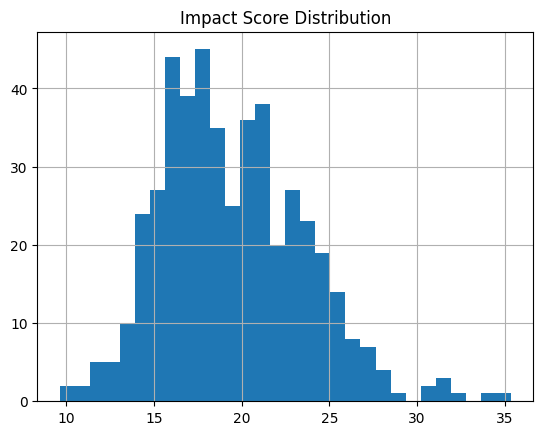

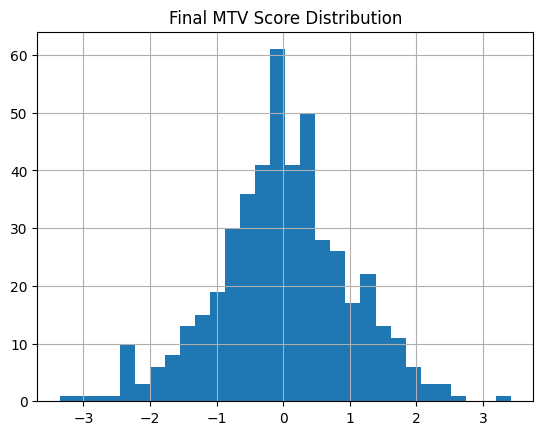

In [9]:
df_test["impact_r"].hist(bins=30)
plt.title("Impact Score Distribution")
plt.show()

df_test["final_score"].hist(bins=30)
plt.title("Final MTV Score Distribution")
plt.show()

In [10]:
mlp, scaler, df_model = train_model_mlp(df_test)

In [11]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

X = df_test[[
    "AGE_base", "GP_base", "salary_m",
    "PTS_per36", "AST_per36", "REB_per36",
    "STL_per36", "BLK_per36",
    "TS_PCT", "FG_PCT_base", "FG3_PCT"
]].values

y_true = df_test["final_score"].values
y_pred = df_model["final_score_pred"].values

print("R^2:", r2_score(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

R^2: 0.9902751052055871
RMSE: 0.09850946708150062


In [12]:
df_model[["PLAYER_NAME", "final_score", "final_score_pred"]].head(10)

,PLAYER_NAME,final_score,final_score_pred
0,Aaron Gordon,-0.872112,-0.884923
1,Aaron Holiday,-0.145492,-0.205402
2,Aaron Nesmith,-0.260687,-0.239642
3,Aaron Wiggins,0.119939,0.136154
4,Adem Bona,1.183098,1.155065
5,Ajay Mitchell,0.024373,0.010222
6,AJ Green,-0.566139,-0.474308
7,AJ Johnson,-0.576757,-0.561378
8,A.J. Lawson,0.436698,0.472647
9,Alec Burks,-0.048226,-0.004586


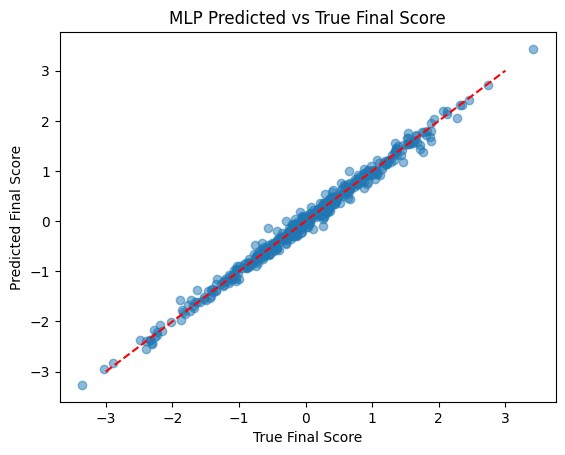

In [13]:
plt.scatter(y_true, y_pred, alpha=0.5)
plt.xlabel("True Final Score")
plt.ylabel("Predicted Final Score")
plt.title("MLP Predicted vs True Final Score")
plt.plot([-3, 3], [-3, 3], 'r--')  
plt.show()